In [1]:
import pylab as py
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal
import numpy.random
from numpy.linalg import inv

import mpl_toolkits.mplot3d


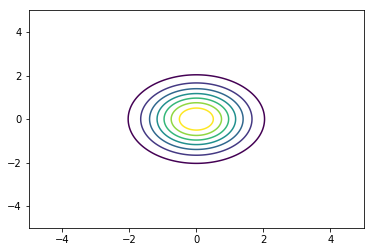

In [2]:
#prior assumptions over W

prior_mean = [0, 0]
prior_cov = [[1,0], [0, 1]]
beta = 1/(0.3)

x = np.linspace(-5, 5, 1001)
y = np.linspace(-5, 5, 1001)
X, Y = np.meshgrid(x, y)
W_prior = np.random.random((len(x),len(y)))

for i in range (0, len(x)):
    for j in range(0,len(y)):
        W_prior[i,j] = (multivariate_normal.pdf((x[i],y[j]), prior_mean, prior_cov))        

W_prior=W_prior.T

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.contour(X,Y,W_prior)

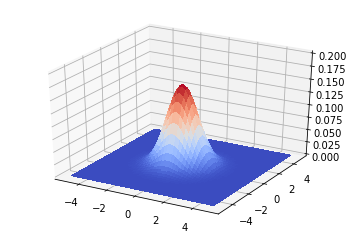

In [3]:
# Plot prior in 3D
fig = plt.figure()

ax = fig.gca(projection='3d')


surf1 = ax.plot_surface(X, Y, W_prior, cmap=plt.cm.coolwarm, 
                                        linewidth=0, antialiased=False)

ax.set_zlim(0, 0.2)

plt.show()

In [4]:
#generating random data from linear function y = -1.3x+0.5+noise, where noise = N(0,0.3)

def generate_x_values(n):
    X=[]
    for i in range(0,n):
        x = np.random.uniform(-5,5)
        X.append(x)
    return X


def generate_y_values(X):
    Y=[]
    for i in range(0,len(X)):
        e = np.random.normal(0,0.3)
        y = (-1.3*X[i]+0.5+ e)
        Y.append(y)
    return Y


def basis_function(X):
    ones = np.ones(len(X), dtype=int)
    phi = np.column_stack((ones, X))
    return phi

In [5]:
def posterior_covariance(phi,prior_cov):
    posterior_cov = inv(beta*np.dot(phi.T,phi) + inv(prior_cov))
    return posterior_cov


def posterior_mean(phi, Y, posterior_cov):
    posterior_m = beta*np.dot(posterior_cov, np.dot(phi.T, Y))
    return posterior_m

In [6]:
def update_posterior(n):
    X = generate_x_values(n)
    Y = generate_y_values(X)
    phi = basis_function(X)
    posterior_cov = posterior_covariance(phi,prior_cov)
    posterior_m = posterior_mean(phi, Y, posterior_cov)
    
    
    x = np.linspace(-5, 5, 200)
    y = np.linspace(-5, 5, 200)
    X, Y = np.meshgrid(x, y)
    W_posterior = np.random.random((len(x),len(y)))
    
    for i in range (0, len(x)): 
        for j in range(0,len(y)):
            W_posterior[i,j] = (multivariate_normal.pdf((x[i],y[j]), posterior_m, posterior_cov))
    

    fig3 = plt.figure()
    ax3 = fig3.add_subplot(111)
    ax3.contour(X,Y,W_posterior)
    
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf1 = ax.plot_surface(X, Y, W_posterior, cmap=plt.cm.coolwarm, 
                                        linewidth=0, antialiased=False)
    ax.set_zlim(0, 20)

    plt.show()
    

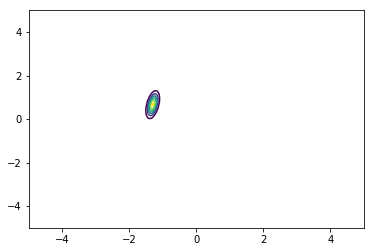

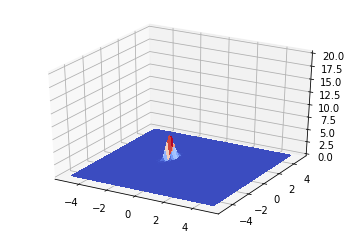

In [7]:
update_posterior(3)